In [1]:
import os
import pandas as pd
from collections import Counter

In [2]:
dir_data_raw = os.path.join("..", "data", "raw")
data_dir_interim = os.path.join("..", "data", "interim")
datasets = ['biorxiv_medrxiv', 'comm_use_subset', 'noncomm_use_subset', 'pmc_custom_license']

In [3]:
data = pd.read_csv(os.path.join(data_dir_interim, "1_full_data.csv"))

## Tokenization

In [4]:
from gensim.parsing.preprocessing import preprocess_string

In [5]:
data["tokens_full_text"] = data["full_text"].str.lower()
data["tokens_full_text"] = data["tokens_full_text"].fillna("")

# Tokenize, remove stopwords, remove punctuation, remove multiple whitespaces, stemming, etc.
data["tokens_full_text"] = data["tokens_full_text"].apply(lambda x: preprocess_string(x))

In [6]:
complete_text = [item for sublist in list(data["tokens_full_text"]) for item in sublist]

## Visualization

In [7]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline 
from wordcloud import WordCloud

In [24]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
            ).generate(" ".join(complete_text))

In [18]:
# plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

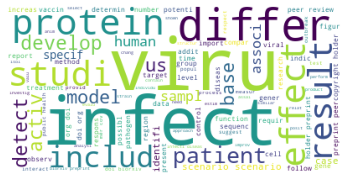

In [25]:
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()